# Show basic stats for locomotion variables during courtship

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

from aux import loadmat_h5
from disp import set_font_size, set_plot, get_line

cc = np.concatenate

NTR = 276

DATA_FILE = 'data/simple/c_song_f_behav.csv'

In [2]:
df = pd.read_csv(DATA_FILE)
ntr = np.max(df.ID) + 1

dfs_tr = [df[df.ID == i] for i in range(ntr)]

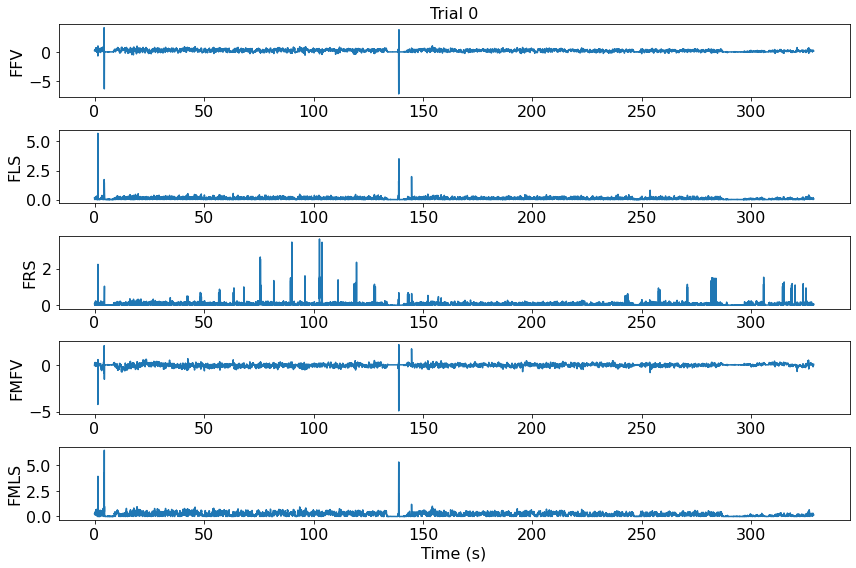

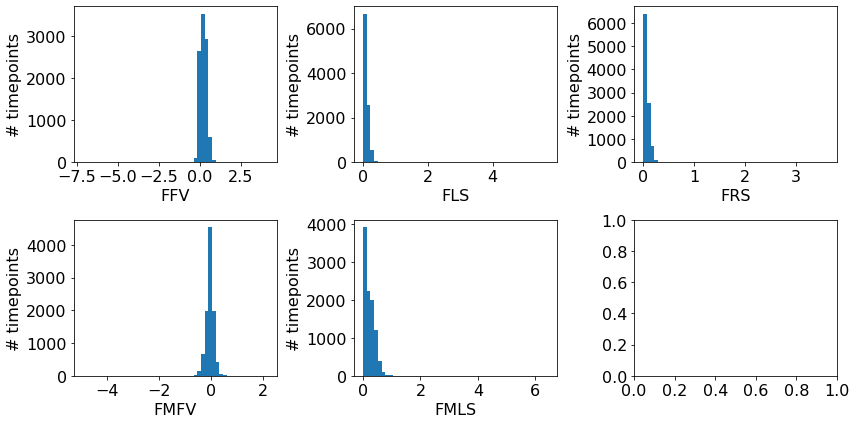

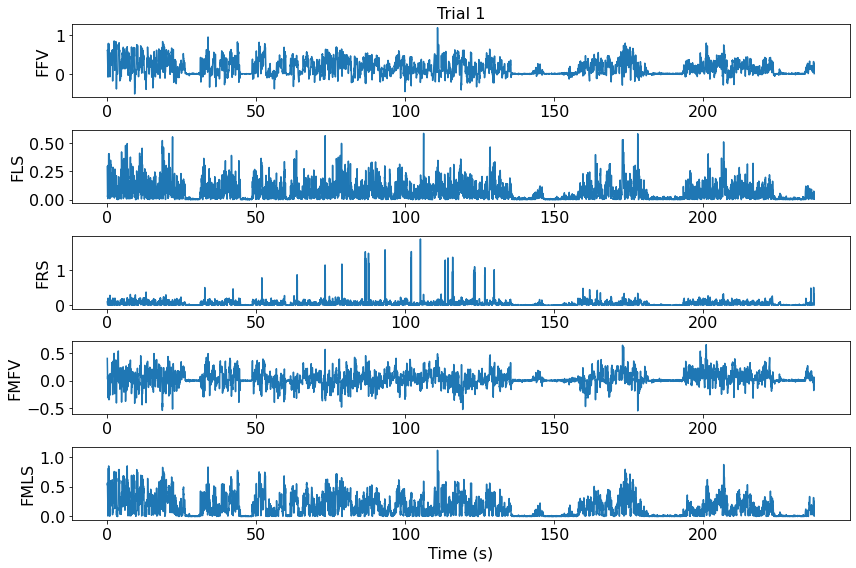

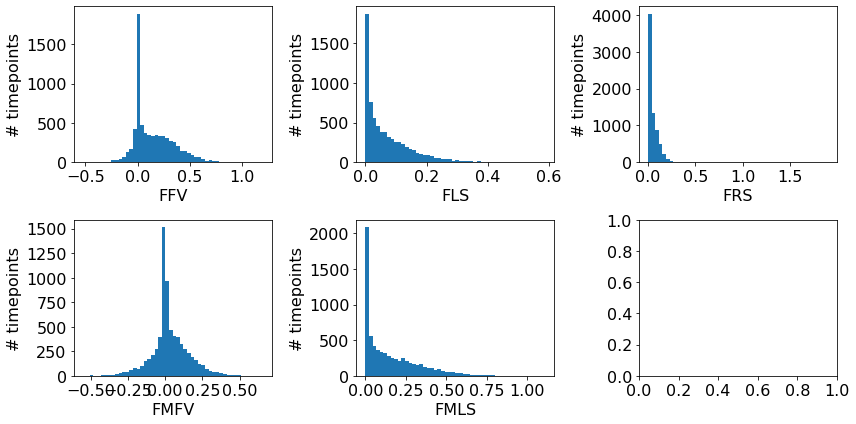

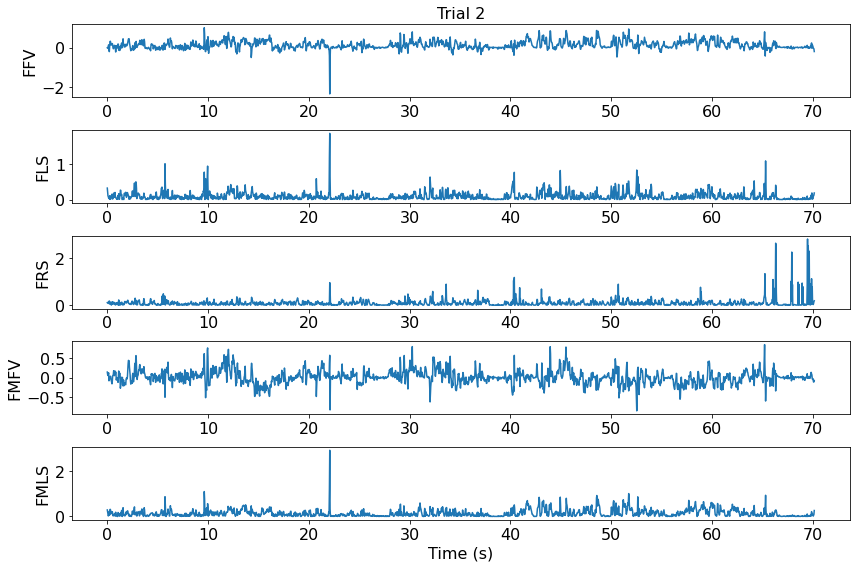

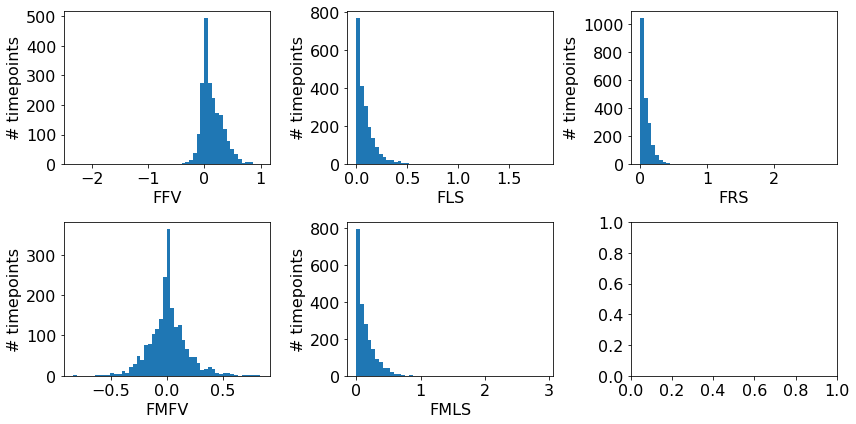

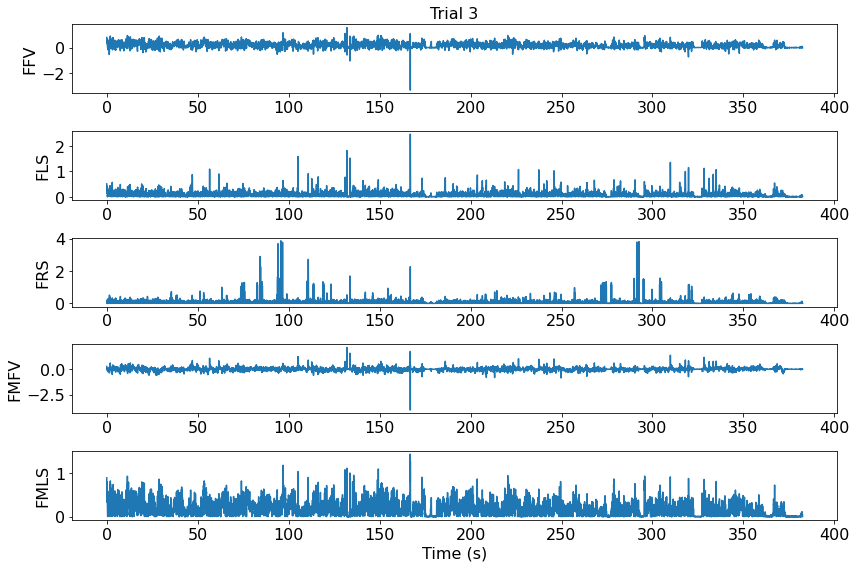

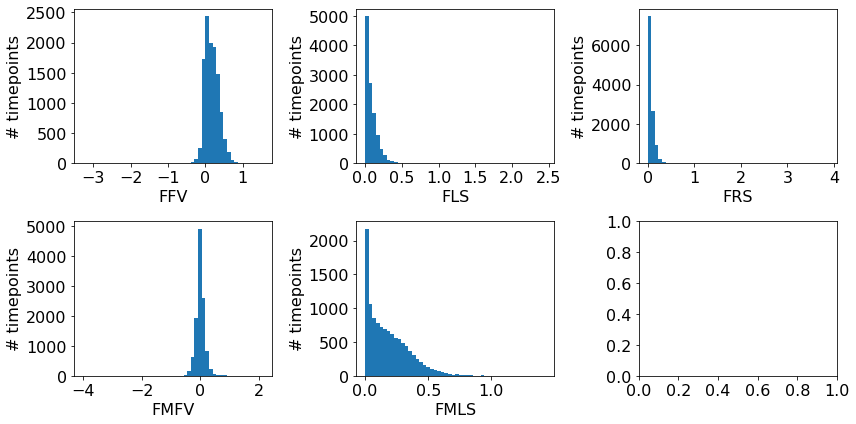

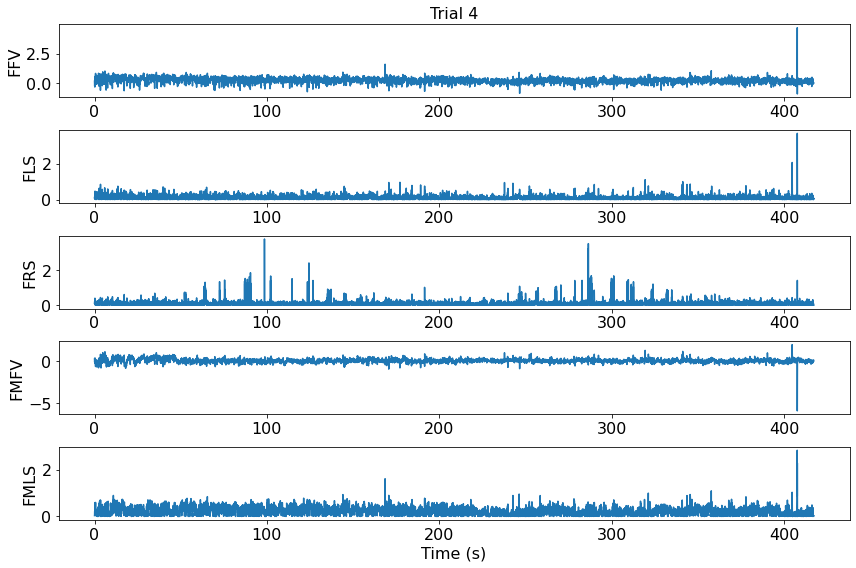

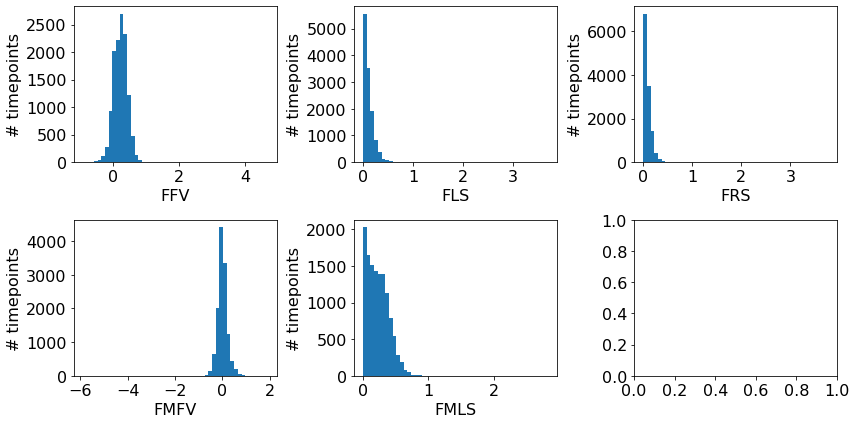

In [3]:
# example traces
for itr in range(5):
    fig, axs = plt.subplots(5, 1, figsize=(12, 8), tight_layout=True)
    for ax, kbhv in zip(axs, ['FFV', 'FLS', 'FRS', 'FMFV', 'FMLS']):
        ax.plot(dfs_tr[itr]['T'], dfs_tr[itr][kbhv])
        ax.set_ylabel(kbhv)
    axs[0].set_title(f'Trial {itr}')
    axs[-1].set_xlabel('Time (s)')
    set_font_size(axs, 16)
    
    fig, axs = plt.subplots(2, 3, figsize=(12, 6), tight_layout=True)
    axs = axs.flatten()
    for ax, kbhv in zip(axs, ['FFV', 'FLS', 'FRS', 'FMFV', 'FMLS']):
        ax.hist(dfs_tr[itr][kbhv], bins=50)
        ax.set_xlabel(kbhv)
        ax.set_ylabel('# timepoints')
        
    set_font_size(axs, 16)

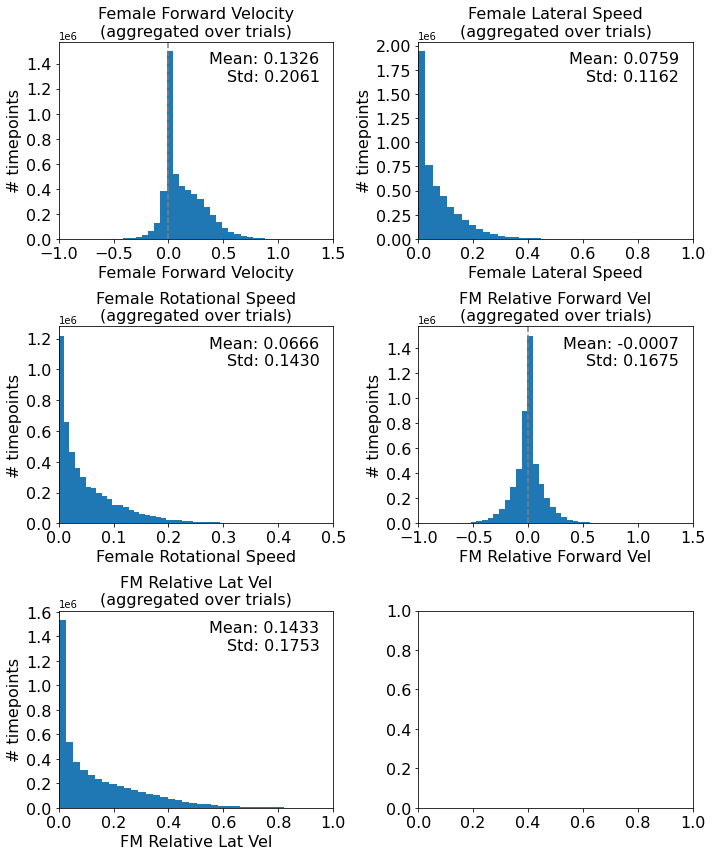

In [4]:
kbhvs = ['FFV', 'FLS', 'FRS', 'FMFV', 'FMLS']
x_lims = {'FFV': (-1, 1.5), 'FLS': (0, 1), 'FRS': (0, .5), 'FMFV': (-1, 1.5), 'FMLS': (0, 1)}
labels = {
    'FFV': 'Female Forward Velocity', 'FLS': 'Female Lateral Speed', 'FRS': 'Female Rotational Speed',
    'FMFV': 'FM Relative Forward Vel', 'FMLS': 'FM Relative Lat Vel'}
n_bin = 400

fig, axs = plt.subplots(3, 2, figsize=(10, 12), tight_layout=True)
axs = axs.flatten()

for kbhv, ax in zip(kbhvs, axs):
    
    ax.hist(df[kbhv], bins=n_bin)
    ax.axvline(0, ls='--', color='gray')
    ax.set_xlim(x_lims[kbhv])
    ax.set_xlabel(labels[kbhv])
    ax.set_ylabel('# timepoints')
    ax.set_title(f'{labels[kbhv]}\n(aggregated over trials)')
    
    ax.text(.95, .95, f'Mean: {df[kbhv].mean():.4f}\nStd: {df[kbhv].std():.4f}', ha='right', va='top', transform=ax.transAxes, fontsize=16)
    
set_font_size(axs, 16)

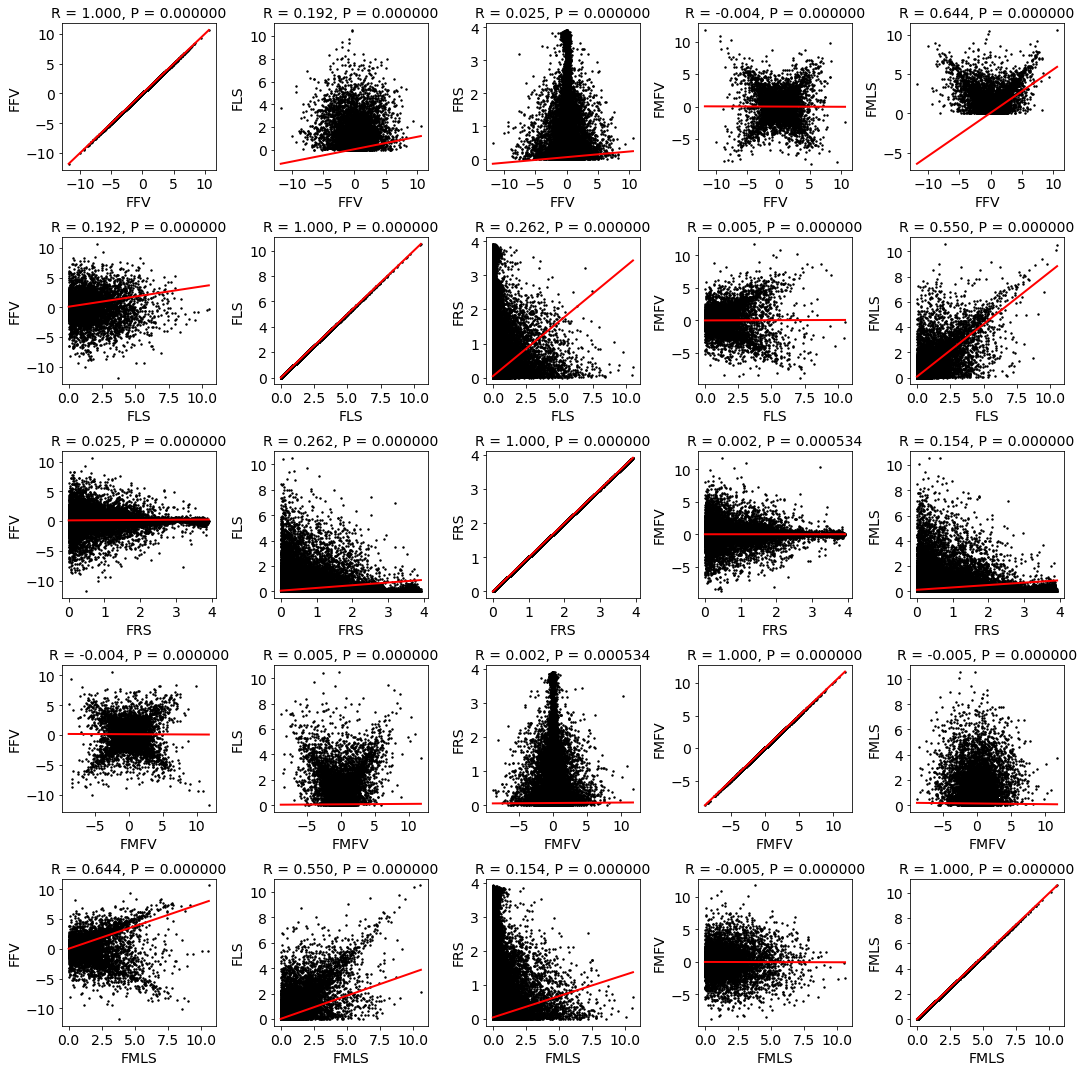

In [8]:
# correlations
fig, axs = plt.subplots(5, 5, figsize=(15, 15), tight_layout=True)
for ck_0, kbhv_0 in enumerate(kbhvs):
    for ck_1, kbhv_1 in enumerate(kbhvs):
        ax = axs[ck_0, ck_1]
        
        x = df[kbhv_0]
        y = df[kbhv_1]
        
        ax.scatter(x, y, c='k', s=2, )
        x_ln, y_ln, (slp, icpt, r, p, stderr) = get_line(x, y)
        ax.plot(x_ln, y_ln, c='r', lw=2)
        
        ax.set_xlabel(kbhv_0)
        ax.set_ylabel(kbhv_1)
        ax.set_title(f'R = {r:.3f}, P = {p:.6f}')
        
        set_font_size(ax, 14)

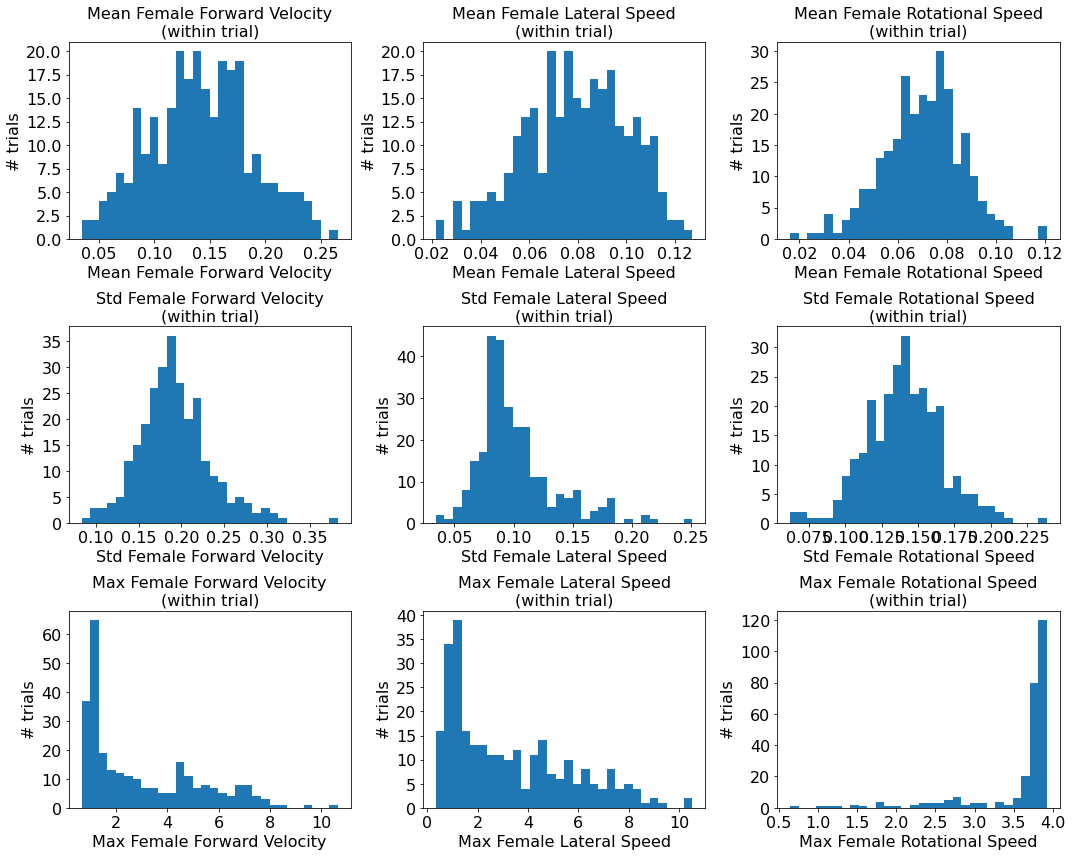

In [5]:
fig, axs = plt.subplots(3, 3, figsize=(15, 12), tight_layout=True)

for kbehav, ax_col in zip(kbehavs, axs.T):
    means = [df_trial[kbehav].mean() for df_trial in dfs_trial]
    stds = [df_trial[kbehav].std() for df_trial in dfs_trial]
    maxs = [df_trial[kbehav].max() for df_trial in dfs_trial]
    
    ax_col[0].hist(means, bins=30)
    ax_col[0].set_xlabel(f'Mean {labels[kbehav]}')
    ax_col[0].set_ylabel('# trials')
    ax_col[0].set_title(f'Mean {labels[kbehav]}\n(within trial)')
    
    ax_col[1].hist(stds, bins=30)
    ax_col[1].set_xlabel(f'Std {labels[kbehav]}')
    ax_col[1].set_ylabel('# trials')
    ax_col[1].set_title(f'Std {labels[kbehav]}\n(within trial)')
    
    ax_col[2].hist(maxs, bins=30)
    ax_col[2].set_xlabel(f'Max {labels[kbehav]}')
    ax_col[2].set_ylabel('# trials')
    ax_col[2].set_title(f'Max {labels[kbehav]}\n(within trial)')
    
set_font_size(axs, 16)

# Pre-song vs during-song female locomotion

FFV (pre-song) CV: 1.3158930919836234
FFV (all) CV: 1.5544714105838655
FLS (pre-song) CV: 1.3720324943875122
FLS (all) CV: 1.5306825035804719
FRS (pre-song) CV: 1.513636157644004
FRS (all) CV: 2.1480181229381534


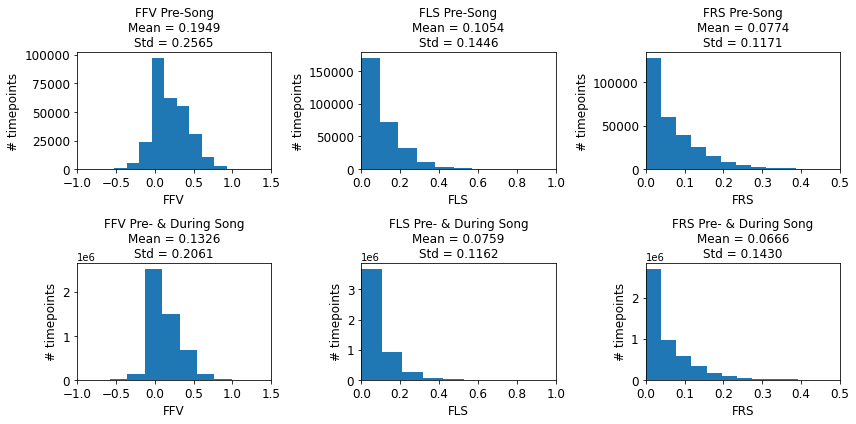

In [6]:
behav_pre_song = {kbehav: [] for kbehav in kbehavs}
behav_all = {kbehav: [] for kbehav in kbehavs}

for df_tr in dfs_trial:
    # first singing timepoint
    it_first_song = np.nonzero(np.array(df_tr['Q'] == 0))[0][0]
    
    for kbehav in kbehavs:
        # behavior before first singing timepoint
        behav_pre_song[kbehav].append(np.array(df_tr[kbehav][:it_first_song]))
        # behavior at all timepoints
        behav_all[kbehav].append(np.array(df_tr[kbehav]))
        
fig, axs = plt.subplots(2, len(kbehav), figsize=(12, 6), tight_layout=True)
for kbehav, ax_col in zip(kbehavs, axs.T):
    ax_col[0].hist(cc(behav_pre_song[kbehav]), bins=100)
    set_plot(ax_col[0], x_lim=x_lims[kbehav], x_label=kbehav, y_label='# timepoints', title=f'{kbehav} Pre-Song\nMean = {np.mean(cc(behav_pre_song[kbehav])):.4f}\nStd = {np.std(cc(behav_pre_song[kbehav])):.4f}', font_size=12)
    
    ax_col[1].hist(cc(behav_all[kbehav]), bins=100)
    set_plot(ax_col[1], x_lim=x_lims[kbehav], x_label=kbehav, y_label='# timepoints', title=f'{kbehav} Pre- & During Song\nMean = {np.mean(cc(behav_all[kbehav])):.4f}\nStd = {np.std(cc(behav_all[kbehav])):.4f}', font_size=12)
    
    print(f'{kbehav} (pre-song) CV: {np.std(cc(behav_pre_song[kbehav]))/np.mean(cc(behav_pre_song[kbehav]))}')
    print(f'{kbehav} (all) CV: {np.std(cc(behav_all[kbehav]))/np.mean(cc(behav_all[kbehav]))}')

FFV (pre-song) CV: 1.3158930919836234
FFV (all) CV: 1.5544714105838655
FLS (pre-song) CV: 1.3720324943875122
FLS (all) CV: 1.5306825035804719
FRS (pre-song) CV: 1.513636157644004
FRS (all) CV: 2.1480181229381534


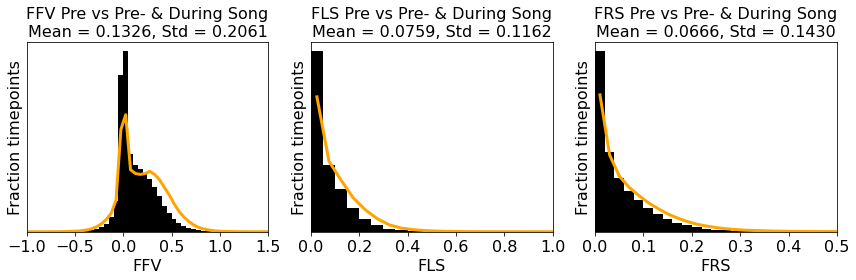

In [7]:
behav_pre_song = {kbehav: [] for kbehav in kbehavs}
behav_all = {kbehav: [] for kbehav in kbehavs}

bins = {'FFV': np.arange(-1, 3, .05), 'FLS': np.arange(0, 2, .05), 'FRS': np.arange(0, 1, .02)}

for df_tr in dfs_trial:
    # first singing timepoint
    it_first_song = np.nonzero(np.array(df_tr['Q'] == 0))[0][0]
    
    for kbehav in kbehavs:
        # behavior before first singing timepoint
        behav_pre_song[kbehav].append(np.array(df_tr[kbehav][:it_first_song]))
        # behavior at all timepoints
        behav_all[kbehav].append(np.array(df_tr[kbehav]))
        
fig, axs = plt.subplots(1, len(kbehav), figsize=(12, 4), tight_layout=True)
for kbehav, ax in zip(kbehavs, axs):
#     ax_col[0].hist(cc(behav_pre_song[kbehav]), bins=bins[kbehav], density=True)
#     set_plot(ax_col[0], x_lim=x_lims[kbehav], x_label=kbehav, y_ticks=[], y_label='# timepoints', title=f'{kbehav} Pre-Song\nMean = {np.mean(cc(behav_pre_song[kbehav])):.4f}, Std = {np.std(cc(behav_pre_song[kbehav])):.4f}', font_size=12)
    
    cts_pre_song = np.histogram(cc(behav_pre_song[kbehav]), bins=bins[kbehav], density=True)[0]
    binc = .5*(bins[kbehav][:-1] + bins[kbehav][1:])
    
    ax.hist(cc(behav_all[kbehav]), bins=bins[kbehav], color='k', density=True)
    ax.plot(binc, cts_pre_song, c='orange', lw=3)
    set_plot(ax, x_lim=x_lims[kbehav], x_label=kbehav, y_ticks=[], y_label='Fraction timepoints', title=f'{kbehav} Pre vs Pre- & During Song\nMean = {np.mean(cc(behav_all[kbehav])):.4f}, Std = {np.std(cc(behav_all[kbehav])):.4f}', font_size=16)
    
    print(f'{kbehav} (pre-song) CV: {np.std(cc(behav_pre_song[kbehav]))/np.mean(cc(behav_pre_song[kbehav]))}')
    print(f'{kbehav} (all) CV: {np.std(cc(behav_all[kbehav]))/np.mean(cc(behav_all[kbehav]))}')